In [1]:
# Initial imports.
import pandas as pd #para manipulación y análisis de datos
from path import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [51]:
# Loading data
file_path = Path("OUTPUT_WITH_4_PERSONAS.csv")
data = pd.read_csv(file_path)
data.head()

,.,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,3
4,4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [52]:
data = data.drop(['CUST_ID','.'],axis=1)

In [53]:
data.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS     313
CREDIT_LIMIT           1
BALANCE                0
BALANCE_FREQUENCY      0
TENURE                 0
dtype: int64

In [54]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=data['CREDIT_LIMIT'].mean()

In [55]:
data.isnull().sum().sort_values(ascending=False).head()

BALANCE              0
BALANCE_FREQUENCY    0
TENURE               0
PRC_FULL_PAYMENT     0
MINIMUM_PAYMENTS     0
dtype: int64

In [56]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [57]:
df_loans = data

In [58]:
#Preprocess the Data
#1. we define the features set

# Define the features set.
X = df_loans.copy()
X = X.drop("cluster", axis=1)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [59]:
#2. we define the target set
# Define the target set.
y = df_loans["cluster"].ravel()
y[:5]

array([3, 1, 2, 3, 3], dtype=int64)

In [60]:
#3.Now, we split into the training and testing sets.
# Splitting into Train and Test sets.
# Por default el test_size es de 25% (",test_size=0.25")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [61]:
#4.Lastly, we can create the StandardScaler instance, fit the scaler with the training set, and scale the data.
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [82]:
#Fit the Random Forest Model
#Before we fit the random forest model to our X_train_scaledand y_train training data, we'll create a random forest instance using the random forest classifier, RandomForestClassifier().
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=100, random_state=5) 
#The n_estimators will allow us to set the number of trees that will be created by the algorithm

In [63]:
#After we create the random forest instance, we need to fit the model with our training sets.
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [64]:
predictions = rf_model.predict(X_test_scaled)
predictions

array([0, 3, 2, ..., 3, 0, 3], dtype=int64)

In [72]:
#Evaluate the Model
#After making predictions on the scaled testing data, we analyze how well our random forest model classifies loan applications by using the confusion_matrix.
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1","Actual 2","Actual 3"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3"])

cm_df

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,575,3,18,17
Actual 1,5,429,10,17
Actual 2,15,5,424,3
Actual 3,14,17,5,681


In [71]:
#These results are relatively the same as the decision tree model. To improve our predictions, let's increase the n_estimators to 500
rf_model = RandomForestClassifier(n_estimators=8950, random_state=5) 
rf_model = rf_model.fit(X_train_scaled, y_train)
predictions = rf_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1","Actual 2","Actual 3"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3"])

cm_df

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,575,3,18,17
Actual 1,5,429,10,17
Actual 2,15,5,424,3
Actual 3,14,17,5,681


In [89]:
import seaborn as sns# for data visualization
import matplotlib.pyplot as plt # for data visualization

Text(15.0, 0.5, 'Actual values')

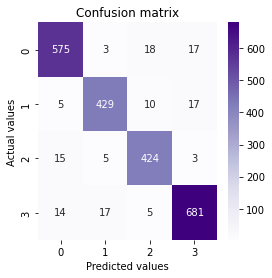

In [93]:
fig=plt.figure(figsize=(4,4))
ax=sns.heatmap(cm,annot=True,cmap="Purples",fmt=".0f")
ax.set_title('Confusion matrix');
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')

In [73]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
acc_score

0.9423592493297587

In [74]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,575,3,18,17
Actual 1,5,429,10,17
Actual 2,15,5,424,3
Actual 3,14,17,5,681


Accuracy Score : 0.9423592493297587
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       613
           1       0.94      0.93      0.94       461
           2       0.93      0.95      0.94       447
           3       0.95      0.95      0.95       717

    accuracy                           0.94      2238
   macro avg       0.94      0.94      0.94      2238
weighted avg       0.94      0.94      0.94      2238



**Precision** is the number of correctly-identified members of a class divided by all the times the model predicted that class. 

**Recall** is the number of members of a class that the classifier identified correctly divided by the total number of members in that class.

**F1 score** is a little less intuitive because it combines precision and recall into one metric. If precision and recall are both high, F1 will be high, too. If they are both low, F1 will be low. If one is high and the other low, F1 will be low. F1 is a quick way to tell whether the classifier is actually good at identifying members of a class, or if it is finding shortcuts

https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56

In [75]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

#The output from this code returns an array of scores for the features in the X_test set, whose sum equals 1.0:

array([0.07548028, 0.00924706, 0.06885171, 0.09158418, 0.05600663,
       0.07529931, 0.11205573, 0.07228514, 0.09575506, 0.04856212,
       0.07537898, 0.08833568, 0.03222642, 0.04399262, 0.04381898,
       0.00844778, 0.00267232])

In [76]:
#To sort the features by their importance with the column in the X_test set, we can modify our code above as follows:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.11205573155743753, 'PURCHASES_FREQUENCY'),
 (0.09575505774296376, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
 (0.09158418471495927, 'ONEOFF_PURCHASES'),
 (0.088335681240505, 'PURCHASES_TRX'),
 (0.07548027613281885, 'BALANCE'),
 (0.07537898161511526, 'CASH_ADVANCE_TRX'),
 (0.0752993108970123, 'CASH_ADVANCE'),
 (0.072285141705327, 'ONEOFF_PURCHASES_FREQUENCY'),
 (0.06885170538065895, 'PURCHASES'),
 (0.05600663380269101, 'INSTALLMENTS_PURCHASES'),
 (0.04856211654671038, 'CASH_ADVANCE_FREQUENCY'),
 (0.04399261843628639, 'PAYMENTS'),
 (0.043818980786318185, 'MINIMUM_PAYMENTS'),
 (0.0322264210081758, 'CREDIT_LIMIT'),
 (0.009247056990298673, 'BALANCE_FREQUENCY'),
 (0.008447780620753274, 'PRC_FULL_PAYMENT'),
 (0.0026723208219683802, 'TENURE')]